# **REGex Final Project TEAM 10**

# **Contributors:**
* Yashraj Bharambe
* Diptesh Chaudhari
* Pranav Karanjawane
* Shrikrushnakumar Sondge
* Ashutosh Mishra

# **Project Description:**
A computer vision approach to classifying garbage into recycling categories could be an efficient way to process waste. Recycling is already significant work for all countries. Among the work needed for recycling, garbage classification is the most fundamental step to enable cost-efficient recycling. This project aims to take images of a single piece of recycling or garbage and classify it into one out of six classes consisting of glass, paper, metal, plastic, cardboard, and trash.

# **Importing Libraries**

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Setting up File locations and Checking sample images**

In [ ]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/REGex/Garbage Classification/'

In [ ]:
train_dir = data_dir + 'TRAIN'
labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [ ]:
# checking the size of data available to us for training out model

for label in labels:
    directory = os.path.join(train_dir, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory)))

Images of label "cardboard":	 323
Images of label "glass":	 401
Images of label "metal":	 328
Images of label "paper":	 476
Images of label "plastic":	 386
Images of label "trash":	 87


# **Plotting some of the images**

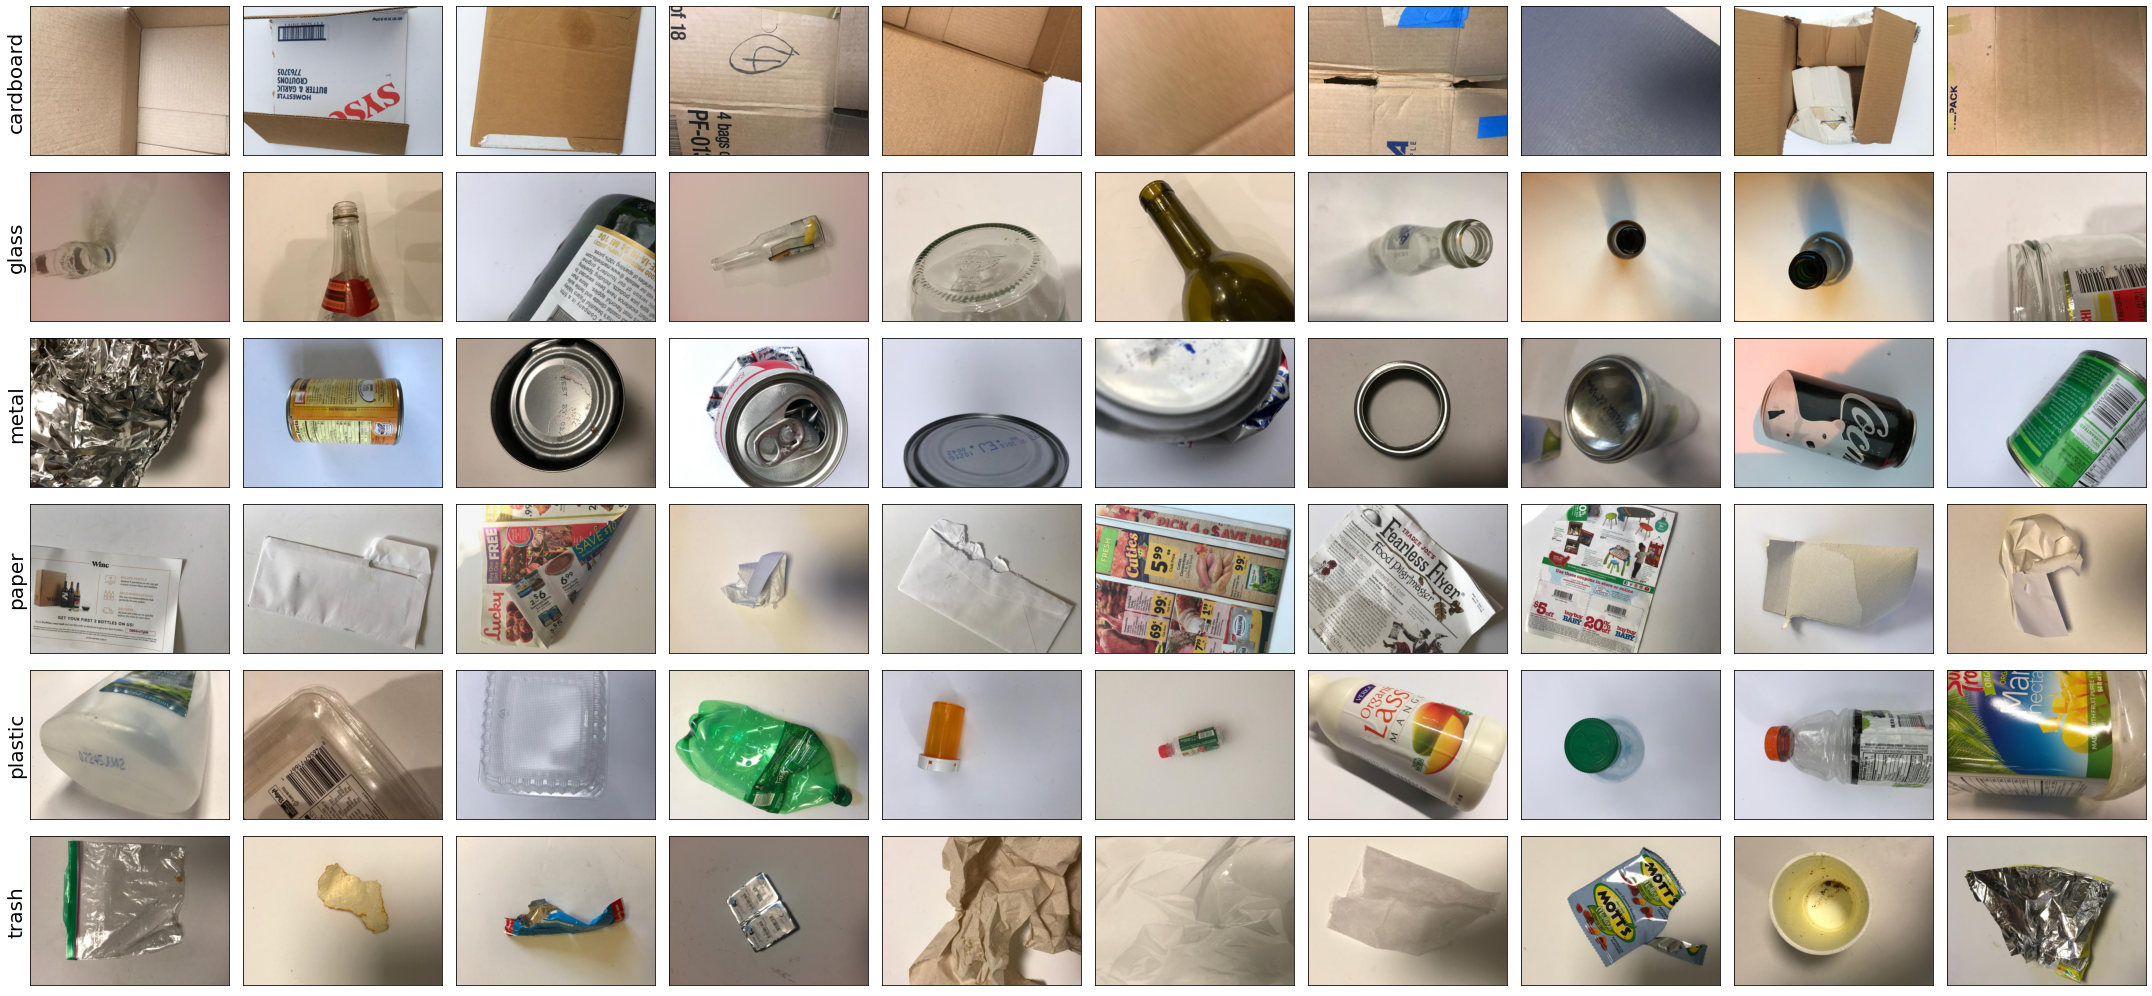

In [ ]:
plt.figure(figsize = (30,14))

for i in range(6):
    directory = os.path.join(train_dir, labels[i])
    for j in range(10):
        path = os.path.join(directory, os.listdir(directory)[j])
        img = mpimg.imread(path)
        
        plt.subplot(6, 10, i*10 + j + 1)
        plt.imshow(img)
        
        if j == 0:
            plt.ylabel(labels[i], fontsize=20)
        
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.tight_layout()
plt.show()

In [ ]:
# checking size of individual image

directory = os.path.join(train_dir, 'cardboard')
path = os.path.join(directory, os.listdir(directory)[0])
image = mpimg.imread(path)
image.shape

(384, 512, 3)

# **Deep Learning**

In [ ]:
# creating the model

model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/REGex/Garbage Classification/vgg19.h5')

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(
              loss = 'sparse_categorical_crossentropy', 
              optimizer = keras.optimizers.Adam(lr = 0.0002), 
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# creating generators for combining data and increasing the gainable insights by slightly modifying the images in the dataset

train_datagen = ImageDataGenerator(horizontal_flip = True, vertical_flip = True,
                                   rotation_range = 15,zoom_range = 0.1,
                                   width_shift_range = 0.15, height_shift_range = 0.15,
                                   shear_range = 0.1,
                                   fill_mode = 'nearest',
                                   rescale = 1./255., 
                                   validation_split = 0.2)

train_generator = train_datagen.flow_from_directory(
                  train_dir, 
                  target_size = (224, 224), 
                  batch_size = 32, 
                  class_mode = 'binary', 
                  subset = 'training')

validation_generator = train_datagen.flow_from_directory(
                       train_dir, 
                       target_size = (224, 224), 
                       batch_size = 32, 
                       shuffle = True, 
                       class_mode = 'binary', 
                       subset = 'validation')

Found 1603 images belonging to 6 classes.
Found 398 images belonging to 6 classes.


In [ ]:
# creating the callback function so that it can be used to end the training in case reached a good accuracy rate (above 90%)

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('accuracy')>0.95):
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

# **Model Training**

In [ ]:
history = model.fit(
    train_generator, 
    epochs = 30, 
    verbose = 1, 
    validation_data = validation_generator, 
    callbacks = [callbacks])

Epoch 1/30
51/51 [==============================] - 434s 8s/step - loss: 0.5450 - accuracy: 0.8091 - val_loss: 0.8795 - val_accuracy: 0.7186
Epoch 2/30
51/51 [==============================] - 35s 694ms/step - loss: 0.4744 - accuracy: 0.8328 - val_loss: 0.8959 - val_accuracy: 0.7060
Epoch 3/30
51/51 [==============================] - 36s 699ms/step - loss: 0.4420 - accuracy: 0.8478 - val_loss: 0.8643 - val_accuracy: 0.7085
Epoch 4/30
51/51 [==============================] - 35s 685ms/step - loss: 0.4521 - accuracy: 0.8509 - val_loss: 0.8599 - val_accuracy: 0.7487
Epoch 5/30
51/51 [==============================] - 35s 687ms/step - loss: 0.4764 - accuracy: 0.8409 - val_loss: 0.7990 - val_accuracy: 0.7437
Epoch 6/30
51/51 [==============================] - 35s 687ms/step - loss: 0.4533 - accuracy: 0.8397 - val_loss: 0.7559 - val_accuracy: 0.7487
Epoch 7/30
51/51 [==============================] - 36s 707ms/step - loss: 0.4319 - accuracy: 0.8509 - val_loss: 0.7503 - val_accuracy: 0.7588
E

# **Actual Labels V/S Predicted Labels**

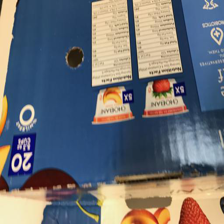

Actual:  cardboard  Prediction:  cardboard


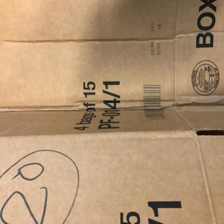

Actual:  cardboard  Prediction:  cardboard


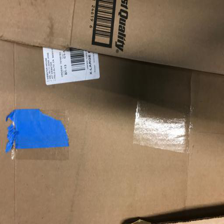

Actual:  cardboard  Prediction:  cardboard


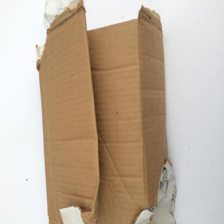

Actual:  cardboard  Prediction:  cardboard


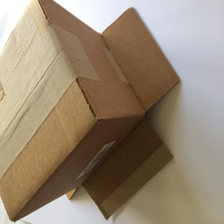

Actual:  cardboard  Prediction:  cardboard


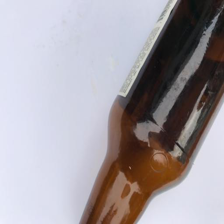

Actual:  glass  Prediction:  glass


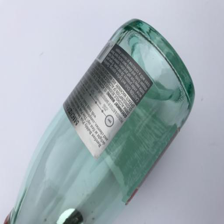

Actual:  glass  Prediction:  metal


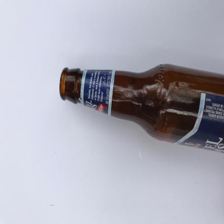

Actual:  glass  Prediction:  glass


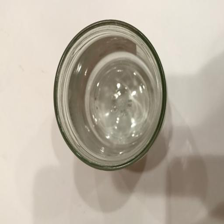

Actual:  glass  Prediction:  glass


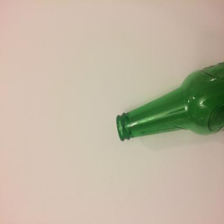

Actual:  glass  Prediction:  glass


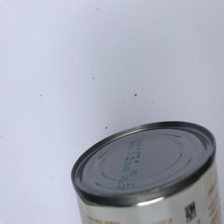

Actual:  metal  Prediction:  metal


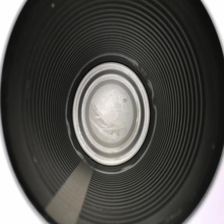

Actual:  metal  Prediction:  metal


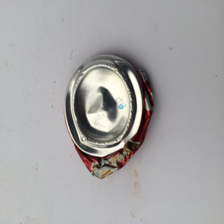

Actual:  metal  Prediction:  metal


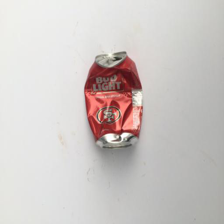

Actual:  metal  Prediction:  metal


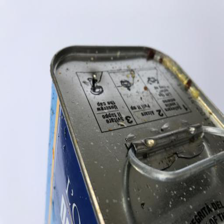

Actual:  metal  Prediction:  metal


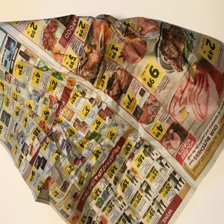

Actual:  paper  Prediction:  paper


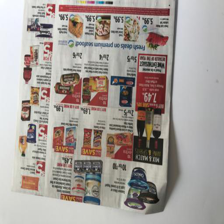

Actual:  paper  Prediction:  paper


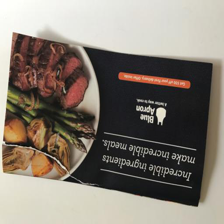

Actual:  paper  Prediction:  paper


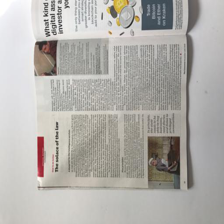

Actual:  paper  Prediction:  paper


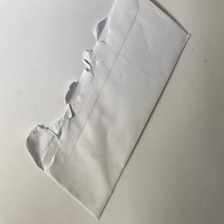

Actual:  paper  Prediction:  paper


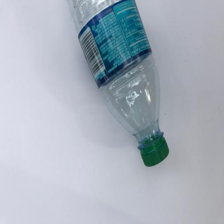

Actual:  plastic  Prediction:  plastic


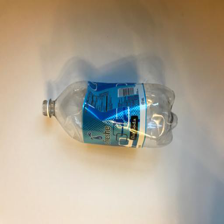

Actual:  plastic  Prediction:  plastic


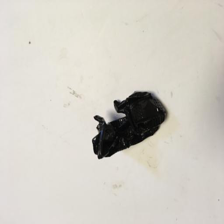

Actual:  plastic  Prediction:  plastic


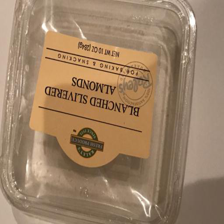

Actual:  plastic  Prediction:  cardboard


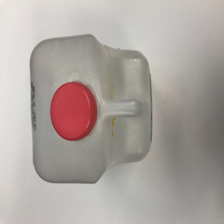

Actual:  plastic  Prediction:  plastic


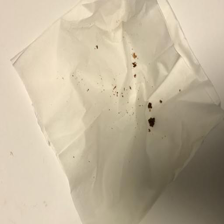

Actual:  trash  Prediction:  trash


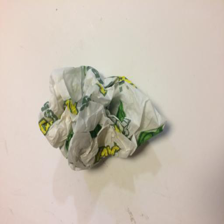

Actual:  trash  Prediction:  trash


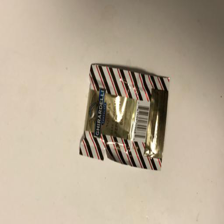

Actual:  trash  Prediction:  trash


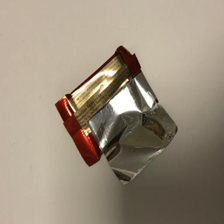

Actual:  trash  Prediction:  trash


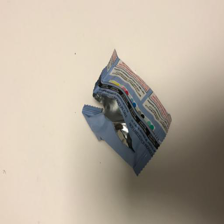

Actual:  trash  Prediction:  trash


In [ ]:
from PIL import Image
#cat = int(input('Enter any category by index: '))
#ind = int(input('Enter any index to test: '))
for cat in range(6):
    directory = os.path.join(train_dir, labels[cat % 6])
    for ind in range(10, 15):
        path = os.path.join(directory, os.listdir(directory)[ind])
        img = Image.open(path)
        img = img.resize((224, 224))
        display(img)
        x = keras.preprocessing.image.img_to_array(img)
        x = x/255
        x = np.expand_dims(x, axis=0)

        images = np.vstack([x])
        classes = model.predict(images)
        pred = labels[np.argmax(classes)]
    
        print("Actual: ", labels[cat % 6], " Prediction: ", pred)